In [2]:
# load the data

import os
import glob 
from matplotlib.pyplot import rc_context
import seaborn as sns
import numpy as np
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

import pickle  #upper threshold 값들을 저장하고 불러오기 위해서.


In [3]:
adata = sc.read_h5ad('data/results/11132021_ov_scRNA_step1.h5ad')



In [4]:
adata.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
MT-RNR1,True,False,69274,13.393212,13.250266,1069515.0,69016
MT-TV,True,False,4317,0.073646,94.593952,5881.0,4300
MT-RNR2,True,False,76801,69.028328,3.824432,5512257.0,76532
MT-ND1,True,False,75360,28.713655,5.628952,2292929.0,75096
MT-TM,True,False,2994,0.044343,96.250704,3541.0,2974
...,...,...,...,...,...,...,...
7SK.1,False,False,427,0.007864,99.465281,628.0,426
VTRNA1-3,False,False,5028,0.124964,93.703588,9979.0,5026
DOHH,False,False,6364,0.087659,92.030555,7000.0,6364
U1.11,False,False,1762,0.029240,97.793501,2335.0,1761


In [5]:
adata

AnnData object with n_obs × n_vars = 73554 × 10085
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'sample_colors'

In [6]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)


normalizing by total count per cell
    finished (0:00:02): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [7]:
np.mean(adata.X)


0.9915741

In [8]:
sc.pp.log1p(adata)


In [9]:
# store normalized counts in the raw slot, 
# we will subset adata.X for variable genes, but want to keep all genes matrix as well.
adata.raw = adata

In [10]:
# compute variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
print("Highly variable genes: %d"%sum(adata.var.highly_variable))

extracting highly variable genes
    finished (0:00:09)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
Highly variable genes: 2093


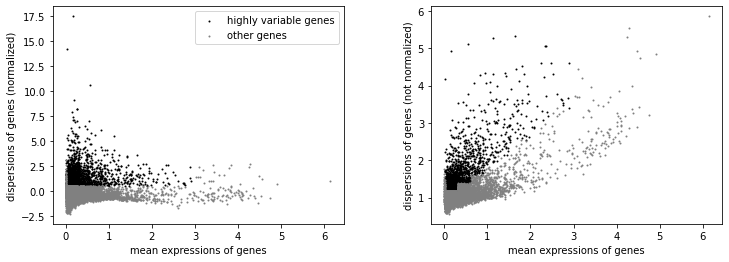

In [11]:
#plot variable genes
sc.pl.highly_variable_genes(adata)

In [12]:
adata

AnnData object with n_obs × n_vars = 73554 × 10085
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'sample_colors', 'log1p', 'hvg'

In [13]:
# subset for variable genes in the dataset
adata = adata[:, adata.var['highly_variable']]


In [18]:
adata

AnnData object with n_obs × n_vars = 73554 × 2093
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'sample_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [14]:

# regress out unwanted variables
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:02:41)


In [15]:
# scale data, clip values exceeding standard deviation 10.
sc.pp.scale(adata, max_value=10)

In [16]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:08)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:15)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:55)


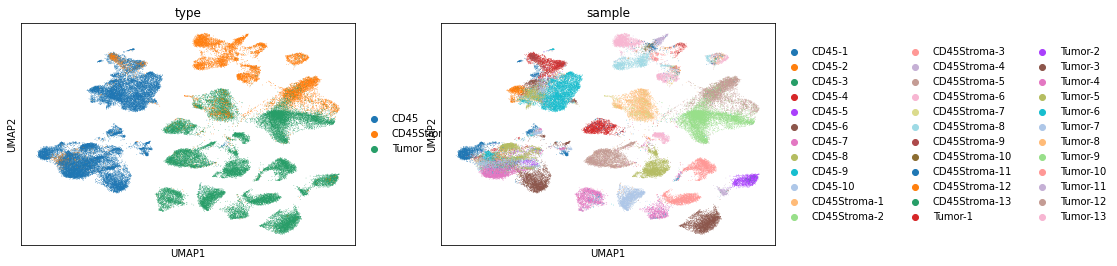

In [17]:
sc.pl.umap(adata, color=['type', 'sample'], palette=sc.pl.palettes.vega_20_scanpy)


우선 type 으로 돌려보고 나중에 sample 로 돌리는 것을 목표로 한다. 

여기에 raw_data 저장하자. 

In [19]:
adata.raw = adata


In [19]:
%%time
sc.external.pp.bbknn(adata, batch_key='type')

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:06)
CPU times: user 7.03 s, sys: 26.4 ms, total: 7.05 s
Wall time: 6.41 s


In [20]:
sc.tl.umap(adata)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:34)


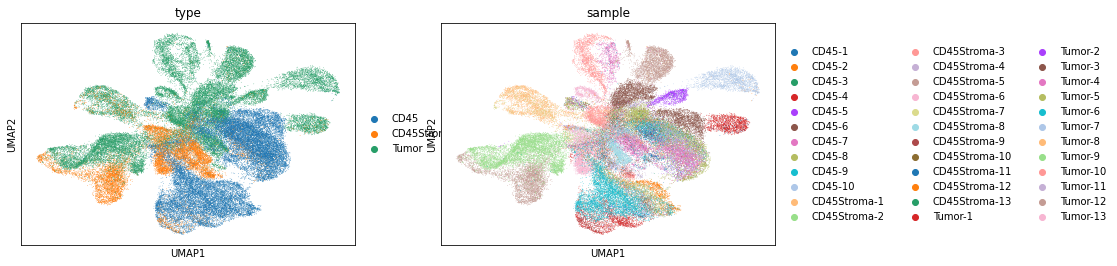

In [21]:
sc.pl.umap(adata, color=['type', 'sample'], palette=sc.pl.palettes.vega_20_scanpy)


In [ ]:
scanpy 에서 제공하는 pallette 가 존재한다. 

## patient 별로 batch correct

In [ ]:
# also revert back to the raw counts as the main matrix in adata
adata = adata.raw.to_adata()

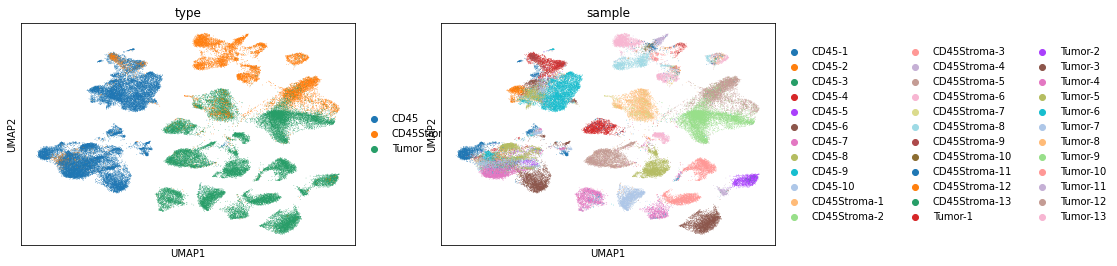

In [20]:
sc.pl.umap(adata, color=['type', 'sample'], palette=sc.pl.palettes.vega_20_scanpy)


In [25]:
%%time
sc.external.pp.bbknn(adata, batch_key='sample')

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:56)
CPU times: user 57 s, sys: 222 ms, total: 57.3 s
Wall time: 56.7 s


In [26]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:37)


여기서 umap 이 하는 일을 제대로 알아야 한다.  그리고 항상 batch correction 을 돌리고 나서는 umap으로 거리를 다시 조정해줘야 한다. 

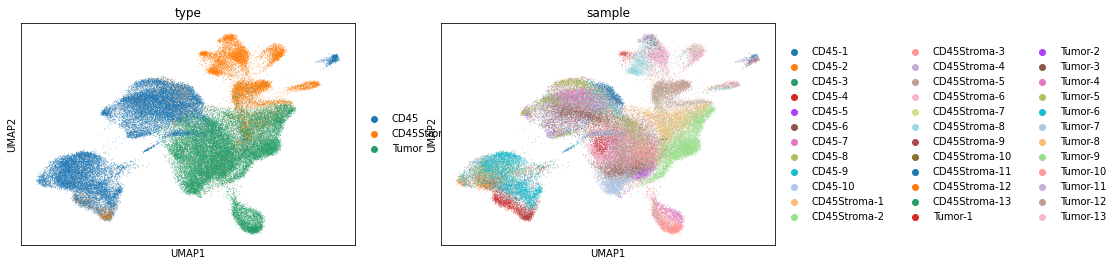

In [27]:
sc.pl.umap(adata, color=['type', 'sample'], palette=sc.pl.palettes.vega_20_scanpy)


In [28]:
# also revert back to the raw counts as the main matrix in adata
adata = adata.raw.to_adata()

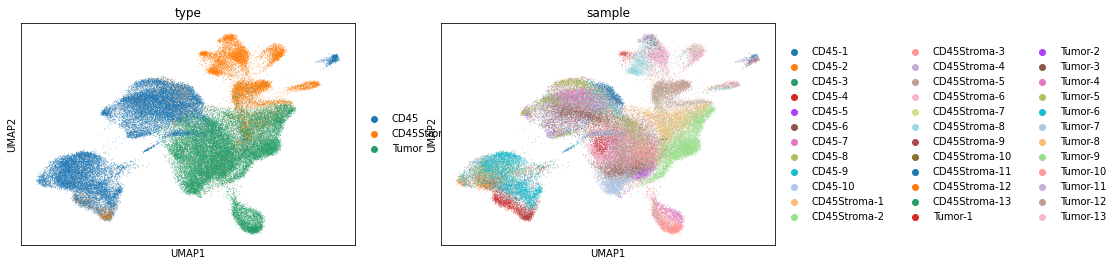

In [29]:
sc.pl.umap(adata, color=['type', 'sample'], palette=sc.pl.palettes.vega_20_scanpy)


In [30]:
sc.tl.umap(adata)

computing UMAP


KeyError: 'No "connectivities" in .obsp'

In [31]:
adata

AnnData object with n_obs × n_vars = 73554 × 2093
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'sample_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'